# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [24]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [25]:
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [26]:
# data_clean = data.copy()

# data_clean["transaction_year"] = data_clean["transaction_date"].dt.year
# data_clean["transaction_month"] = data_clean["transaction_date"].dt.month
# data_clean["transaction_day"] = data_clean["transaction_date"].dt.day
# data_clean["transaction_day_of_week"] = data_clean["transaction_date"].dt.dayofweek


<Axes: >

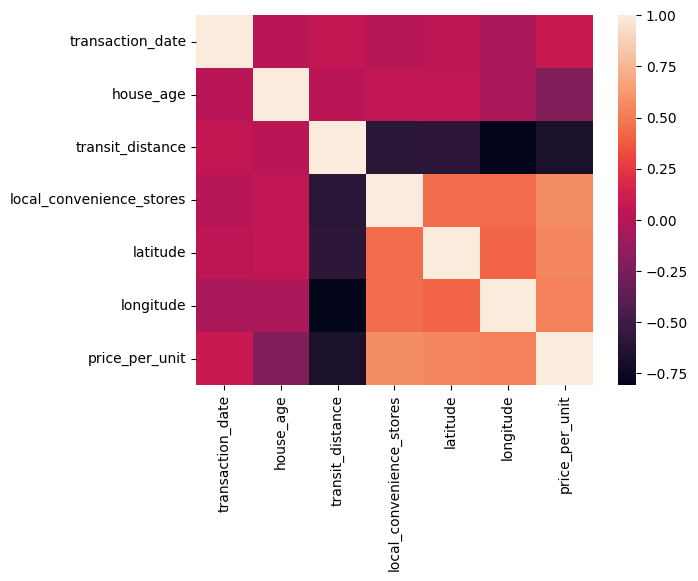

In [27]:
# Your code to explore data and train a regression model
import seaborn as sns

sns.heatmap(data.corr())

<Axes: >

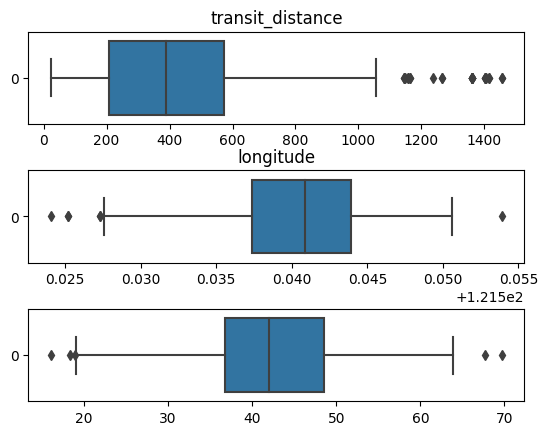

In [28]:
import matplotlib.pyplot as plt
data_no_outliers = data.copy()
data_no_outliers = data_no_outliers[data_no_outliers['transit_distance'] < 1500]
data_no_outliers = data_no_outliers[data_no_outliers['longitude'] > 121.52]
data_no_outliers = data_no_outliers[(data_no_outliers['price_per_unit'] < 70) & (data_no_outliers['price_per_unit'] > 15)]
# sns.boxplot(data['transit_distance'])

fig, axes = plt.subplots(nrows=3, ncols=1)
plt.subplots_adjust(hspace=0.5, wspace=0.3)


axes[0].set_title('transit_distance')
axes[1].set_title('longitude')

sns.boxplot(data_no_outliers['transit_distance'], ax=axes[0], orient='h')
sns.boxplot(data_no_outliers['longitude'], ax=axes[1], orient='h')
sns.boxplot(data_no_outliers['price_per_unit'], ax=axes[2], orient='h')

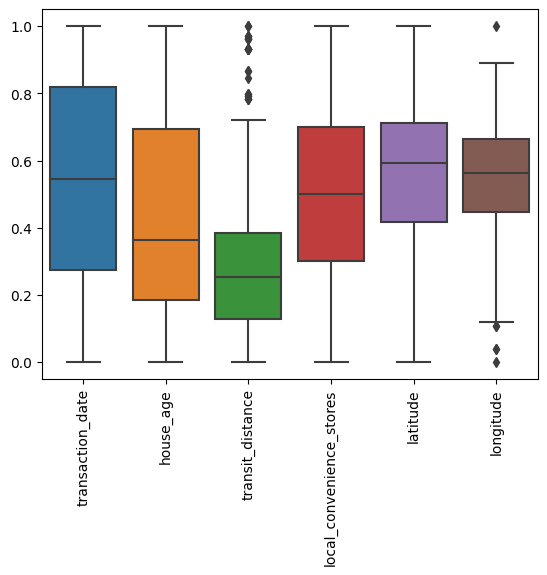

In [29]:
from sklearn.preprocessing import MinMaxScaler

# normalize all columns in data
scaler = MinMaxScaler()

data_only_features = data_no_outliers.drop('price_per_unit', axis=1)

data_normalized = pd.DataFrame(scaler.fit_transform(data_only_features), columns=data_only_features.columns)

g = sns.boxplot(data_normalized)

g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

In [30]:
data_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          299 non-null    float64
 1   house_age                 299 non-null    float64
 2   transit_distance          299 non-null    float64
 3   local_convenience_stores  299 non-null    float64
 4   latitude                  299 non-null    float64
 5   longitude                 299 non-null    float64
dtypes: float64(6)
memory usage: 14.1 KB


In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
def analyze_prediction(y_test: list, prediction: list):
    mse = mean_squared_error(y_test, prediction)
    print("MSE: ", mse)

    rmse = np.sqrt(mse)
    print("RMSE: ", rmse)

    r2 = r2_score(y_test, prediction)
    print("R2: ", r2)

    data = pd.DataFrame({'y_test': y_test, 'prediction': prediction})

    sns.lmplot(x='y_test', y='prediction', data=data)
    # plt.xlabel("Real Values")
    # plt.ylabel("Predicted Values")

    # polyfit = np.polyfit(y_test, prediction, 1)
    # poly1d_fn = np.poly1d(polyfit)

In [32]:
from sklearn.model_selection import train_test_split

X = data_normalized[["transaction_date", "house_age", "transit_distance", "local_convenience_stores", "latitude", "longitude"]]
y = data_no_outliers["price_per_unit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

MSE:  36.475474170239025
RMSE:  6.039492873597834
R2:  0.6326141608281166


c:\Users\evogt\source\repos\azure-ml\source\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


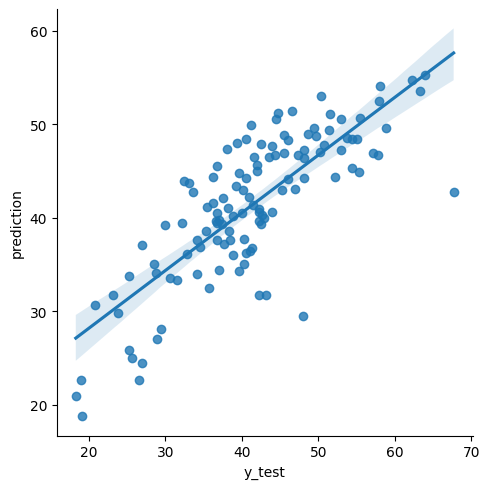

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
analyze_prediction(y_test, prediction)



MSE:  94.96069828055161
RMSE:  9.744778000578135
R2:  0.043543185667108575


c:\Users\evogt\source\repos\azure-ml\source\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


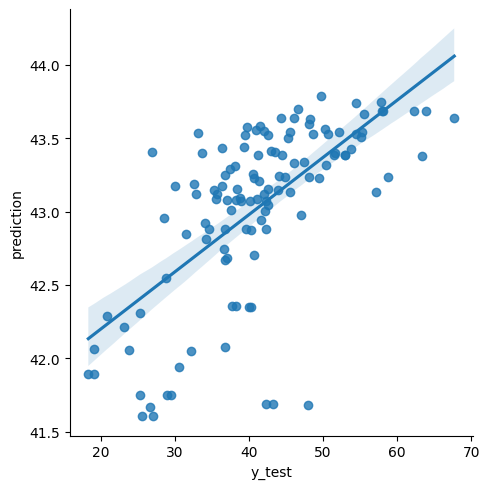

In [34]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
prediction = model.predict(X_test)
analyze_prediction(y_test, prediction)


MSE: 

c:\Users\evogt\source\repos\azure-ml\source\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


 82.477375
RMSE:  9.081705511631611
R2:  0.16927688216888892


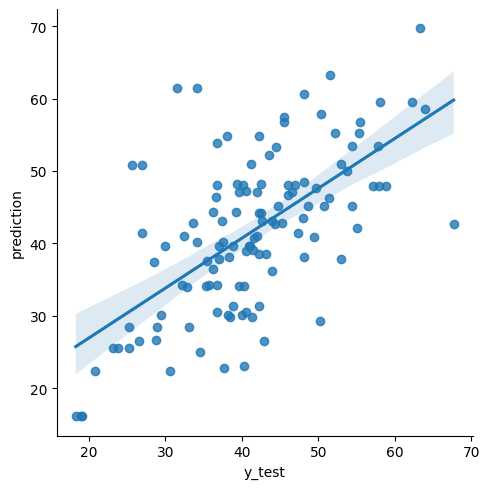

In [35]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor().fit(X_train, y_train)
prediction = model.predict(X_test)
analyze_prediction(y_test, prediction)

MSE:  38.68135656580789
RMSE:  6.219433781768875
R2:  0.6103962192263654


c:\Users\evogt\source\repos\azure-ml\source\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


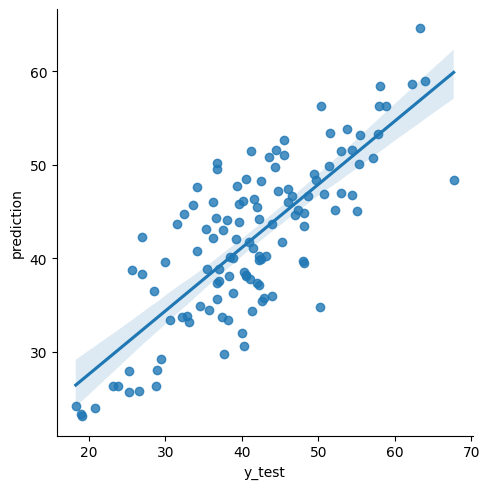

In [36]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)
prediction = model.predict(X_test)
analyze_prediction(y_test, prediction)

Best parameter combination: {'learning_rate': 0.05, 'n_estimators': 50} 

MSE:  35.80437571188595
RMSE:  5.98367576928145
R2:  0.6393735539792045


c:\Users\evogt\source\repos\azure-ml\source\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


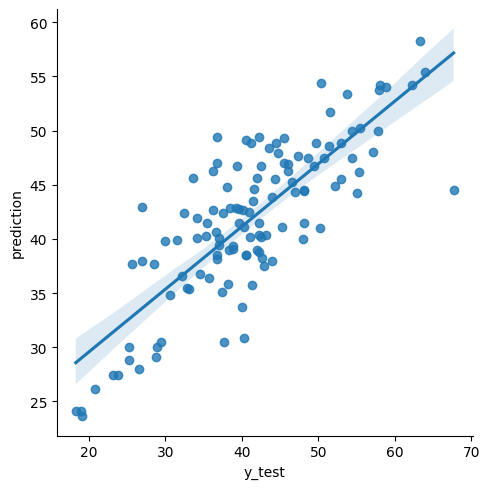

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV


algorithm = GradientBoostingRegressor()
params = {
 'learning_rate': [0.01, 0.05, 0.1],
 'n_estimators' : [1, 25, 50, 100]
 }
score = make_scorer(r2_score)

grid_search = GridSearchCV(algorithm, params, scoring=score, return_train_score=True)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
print("Best parameter combination:", grid_search.best_params_, "\n")
prediction = model.predict(X_test)
analyze_prediction(y_test, prediction)

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [39]:
# Your code to use the trained model
X_new = scaler.transform(np.array([[2013.167, 16.2, 289.3248, 5, 24.98203, 121.54348],
                                   [2013.000, 13.6, 4082.015, 0, 24.94155, 121.50381]]))
predictions = model.predict(X_new)

print(predictions)

[48.52896884 26.49894024]


c:\Users\evogt\source\repos\azure-ml\source\.venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\evogt\source\repos\azure-ml\source\.venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
